## SQL DB Test

In [4]:
%%time
#!pip install ipython-sql
#!conda install mysqlclient --yes
#!pip install mysqlclient
#!pip install PyMySQL
#!pip install mysql-connector-python


     |████████████████████████████████| 4.8 MB 834 kB/s eta 0:00:01
CPU times: user 207 ms, sys: 84.1 ms, total: 291 ms
Wall time: 7.67 s


In [1]:
import os
import pymysql
import mysql.connector
import pandas as pd
import numpy as np

In [2]:

# host = os.getenv('MYSQL_HOST')
# port = os.getenv('MYSQL_PORT')
# user = os.getenv('MYSQL_USER')
# password = os.getenv('MYSQL_PASSWORD')
# database = os.getenv('MYSQL_DATABASE')


conn = pymysql.connect(
    host='cdcmortdb.cbd1ivxdzkbb.us-east-1.rds.amazonaws.com',
    port=int(3306),
    user="mortalityMaster",
    password='mortality1234',
    db="cdcmortality")


In [136]:
%%time 

#upload person info 
person_info_2018 = pd.read_sql_query("SELECT person_id, year_id, resident_status, edu_2003_rev, sex, age_recode_27, marital_status, bridged_race_1 FROM mortality_2018", conn)

#upload heart disease underlying cause of death
#hd_cause_death_2018 = pd.read_sql_query("SELECT person_id, year_id, cause_recode_358 FROM mortality_2018 WHERE (cause_recode_358 >= 197 AND cause_recode_358 <= 246)", conn)

#upload cancer underlying cause of death 
#can_cause_death_2018 = pd.read_sql_query("SELECT person_id, year_id, cause_recode_358 FROM mortality_2018 WHERE (cause_recode_358 >= 069 AND cause_recode_358 <= 146)", conn)

#upload and filter recode multiple conditions of death
#rec_cond_2018 = pd.read_sql_query("SELECT person_id, year_id, cause_recode_358, number_of_recordaxis_conditions, recordaxis_conditions, recAx_condition_1st, recAx_condition_2nd, recAx_condition_3rd,recAx_condition_4th, recAx_condition_5th, recAx_condition_6th,recAx_condition_7th, recAx_condition_8th, recAx_condition_9th,recAx_condition_10th, recAx_condition_11th, recAx_condition_12th,recAx_condition_13th, recAx_condition_14th, recAx_condition_15th,recAx_condition_16th, recAx_condition_17th, recAx_condition_18th,recAx_condition_19th, recAx_condition_20th FROM mortality_2018 WHERE (cause_recode_358 BETWEEN 069 AND 246)", conn)
#convert string to integer
#rec_cond_2018.cause_recode_358=rec_cond_2018.cause_recode_358.astype(np.int64)
#filter only heart disease and cancer codes
#rec_cond_2018.cause_recode_358=[~((rec_cond_2018.cause_recode_358>=147) & (rec_cond_2018.cause_recode_358<=196))]



CPU times: user 1min 14s, sys: 6.87 s, total: 1min 21s
Wall time: 1min 53s


In [127]:
person_info_2016 = pd.read_sql_query("SELECT person_id, year_id, resident_status, edu_2003_rev, sex, age_recode_27, marital_status, bridged_race_1 FROM mortality_2016", conn)


In [126]:
person_info_2018.size

22713648

In [122]:
hd_cause_death_2018.size

2605986

In [124]:
pd.merge(person_info_2018, hd_cause_death_2018, on="person_id")

,person_id,year_id_x,resident_status,edu_2003_rev,sex,age_recode_27,marital_status,bridged_race_1,year_id_y,cause_recode_358
0,9,8,1,4,M,22,M,1,8,230
1,10,8,1,4,F,23,W,1,8,215
2,14,8,1,3,F,13,S,1,8,219
3,15,8,1,6,F,23,W,1,8,242
4,16,8,3,7,F,23,W,1,8,214
...,...,...,...,...,...,...,...,...,...,...
868657,2839191,8,1,9,F,22,U,1,8,215
868658,2839194,8,1,1,F,21,M,2,8,207
868659,2839195,8,1,9,F,17,U,2,8,215
868660,2839197,8,1,3,F,24,S,1,8,207


In [106]:
can_cause_death_2018.head()

,person_id,year_id,cause_recode_358
0,3,8,113
1,11,8,83
2,12,8,88
3,13,8,93
4,17,8,93


In [107]:
rec_cond_2018.head()

NameError: name 'rec_cond_2018' is not defined

## EDA with CSV file 

In [50]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%%time

mort2018=pd.read_csv('mort_2018.csv')

CPU times: user 51.1 s, sys: 17.4 s, total: 1min 8s
Wall time: 1min 18s


In [133]:
mort2018.size

249850040

In [134]:
mort2018.columns

Index(['person_id', 'year_id', 'resident_status', 'edu', 'edu_1989_rev',
       'edu_1989_Desc', 'edu_2003_rev', 'edu_2003_Desc', 'edu_reporting_flag',
       'month_of_death', 'sex', 'reported_age_tmstmp_flag', 'reported_age',
       'age_detail', 'age_sub_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22', 'place_of_death_and_status',
       'marital_status', 'day_of_week_of_death', 'data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury', 'underlying_cause_of_death', 'icd_10th_revision',
       'cause_recode_358', 'cause_recode_113', 'infant_cause_130',
       'cause_recode_39', 'multiple_conditions',
       'number_of_entityaxis_conditions', 'entityaxis_conditions_con',
       'entAx_condition_1st', 'entAx_condition_2nd', 'entAx_condition_3rd',
       'entAx_condition_4th', 'entAx_condition_5th', 'entAx_condition_6th',
       'entAx_condition_7th', 'entAx_condition_8th

In [132]:
%%time
pd.set_option('display.max_columns', None)
mort2018.head()

CPU times: user 1.39 ms, sys: 8.49 ms, total: 9.89 ms
Wall time: 23 ms


,person_id,year_id,resident_status,edu,edu_1989_rev,edu_1989_Desc,edu_2003_rev,edu_2003_Desc,edu_reporting_flag,month_of_death,sex,reported_age_tmstmp_flag,reported_age,age_detail,age_sub_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_status,marital_status,day_of_week_of_death,data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury,underlying_cause_of_death,icd_10th_revision,cause_recode_358,cause_recode_113,infant_cause_130,cause_recode_39,multiple_conditions,number_of_entityaxis_conditions,entityaxis_conditions_con,entAx_condition_1st,entAx_condition_2nd,entAx_condition_3rd,entAx_condition_4th,entAx_condition_5th,entAx_condition_6th,entAx_condition_7th,entAx_condition_8th,entAx_condition_9th,entAx_condition_10th,entAx_condition_11th,entAx_condition_12th,entAx_condition_13th,entAx_condition_14th,entAx_condition_15th,entAx_condition_16th,entAx_condition_17th,entAx_condition_18th,entAx_condition_19th,entAx_condition_20th,number_of_recordaxis_conditions,recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,recAx_condition_6th,recAx_condition_7th,recAx_condition_8th,recAx_condition_9th,recAx_condition_10th,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th,bridged_race,bridged_race_1,bridged_race_flag,race_imputation_flag,allother_races_imputed_2,bridged_race_recode_5,hispanicorigin,hispanicorigin_bridgeracerecode
0,1,8,3,31,,NaN,3,HsGedCom,1,1,F,1,046 351507,1046,,35,15,7,,1,D,2,2018,U,7,C,N,99,99,A419023 010 37,A419,23,10,,37,0311J189 21J869 31A419 ...,3,11J189 21J869 31A419 ...,11J189,21J869,31A419,,,,,,,,,,,,,,,,,,3,A419 J189 J869 ...,A419,J189,J869,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
1,2,8,1,31,,NaN,3,HsGedCom,1,1,M,1,028 311105,1028,,31,11,5,,7,S,4,2018,N,1,B,N,9,99,V475392 114 38,V475,392,114,,38,0511S099 12V475 13T099 14T149 15S021 ...,5,11S099 12V475 13T099 14T149 15S021 ...,11S099,12V475,13T099,14T149,15S021,,,,,,,,,,,,,,,,5,V475 S021 S099 T099 T149 ...,V475,S021,S099,T099,T149,,,,,,,,,,,,,,,,03 23,3,99,99,2,3,100,8
2,3,8,1,61,,NaN,6,BA BS,1,1,M,1,093 442411,1093,,44,24,11,,6,D,3,2018,U,7,B,N,99,99,C61 113 033 11,C61,113,33,,11,0111C61 ...,1,11C61 ...,11C61,,,,,,,,,,,,,,,,,,,,1,C61 ...,C61,,,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
3,4,8,1,21,,NaN,2,9-12NoD,1,1,M,1,090 442411,1090,,44,24,11,,1,W,7,2018,U,7,C,N,99,99,A419023 010 37,A419,23,10,,37,0311R688 21A419 61I509 ...,3,11R688 21A419 61I509 ...,11R688,21A419,61I509,,,,,,,,,,,,,,,,,,3,A419 I509 R688 ...,A419,I509,R688,,,,,,,,,,,,,,,,,,01 11,1,99,99,1,1,100,6
4,5,8,2,41,,NaN,4,SomeCllg,1,1,F,1,031 321205,1031,,32,12,5,,1,S,2,2018,U,7,C,N,99,99,K701298 094 30,K701,298,94,,30,0911G934 21K701 22R579 31K769 32R688 41D689 61...,9,11G934 21K701 22R579 31K769 32R688 41D689 61K7...,11G934,21K701,22R579,31K769,32R688,41D689,61K703,62D649,63E880,,,,,,,,,,,,8,K701 D649 D689 E880 G934 K703 R579 R688 ...,K701,D649,D689,E880,G934,K703,R579,R688,,,,,,,,,,,,,03 23,3,99,99,2,3,100,8


In [8]:
mort2018=mort2018[["person_id",
          "year_id", 
          "resident_status",
          "edu_2003_rev", "edu_2003_Desc",
          "month_of_death",
          "sex",
          "age_recode_27",
          "place_of_death_and_status",
          "marital_status",
          "bridged_race_1","bridged_race_recode_5","hispanicorigin","hispanicorigin_bridgeracerecode",
          "day_of_week_of_death", "data_year",
          "injury_at_work", "manner_of_death", "autopsy", "activity_code","place_of_injury",
          "cause_recode_358",
          "number_of_recordaxis_conditions",
          "recAx_condition_1st","recAx_condition_2nd","recAx_condition_3rd","recAx_condition_4th",
          "recAx_condition_5th","recAx_condition_6th","recAx_condition_7th","recAx_condition_8th",
          "recAx_condition_9th", "recAx_condition_10th","recAx_condition_11th","recAx_condition_12th",
          "recAx_condition_13th", "recAx_condition_14th", "recAx_condition_15th","recAx_condition_16th", 
          "recAx_condition_17th", "recAx_condition_18th","recAx_condition_19th", "recAx_condition_20th"
            ]]

In [152]:
mort2018.size

119246610

In [188]:
mort2018.head()

,person_id,year_id,resident_status,edu_2003_rev,edu_2003_Desc,month_of_death,sex,age_recode_27,place_of_death_and_status,marital_status,bridged_race_1,hispanicorigin,hispanicorigin_bridgeracerecode,day_of_week_of_death,data_year,injury_at_work,manner_of_death,autopsy,activity_code,place_of_injury,cause_recode_358,number_of_recordaxis_conditions,recAx_condition_1st,recAx_condition_2nd,recAx_condition_3rd,recAx_condition_4th,recAx_condition_5th,recAx_condition_6th,recAx_condition_7th,recAx_condition_8th,recAx_condition_9th,recAx_condition_10th,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th
0,1,8,3,3,HsGedCom,1,F,15,1,D,1,100,6,2,2018,U,7,N,99,99,23,3,A419,J189,J869,,,,,,,,,,,,,,,,,
1,2,8,1,3,HsGedCom,1,M,11,7,S,3,100,8,4,2018,N,1,N,9,99,392,5,V475,S021,S099,T099,T149,,,,,,,,,,,,,,,
2,3,8,1,6,BA BS,1,M,24,6,D,1,100,6,3,2018,U,7,N,99,99,113,1,C61,,,,,,,,,,,,,,,,,,,
3,4,8,1,2,9-12NoD,1,M,24,1,W,1,100,6,7,2018,U,7,N,99,99,23,3,A419,I509,R688,,,,,,,,,,,,,,,,,
4,5,8,2,4,SomeCllg,1,F,12,1,S,3,100,8,2,2018,U,7,N,99,99,298,8,K701,D649,D689,E880,G934,K703,R579,R688,,,,,,,,,,,,


In [10]:
code_358=mort2018["cause_recode_358"]
hd2018=mort2018[(code_358>=197) & (code_358<=246)]

can2018=mort2018[(code_358>=69) & (code_358<=146)]

### Heart Disease EDA

215    187858
211    108610
230     65232
214     64926
228     56446
238     52312
207     51524
239     41462
236     28294
206     22905
Name: cause_recode_358, dtype: int64


Text(0, 0.5, 'Number of deaths')

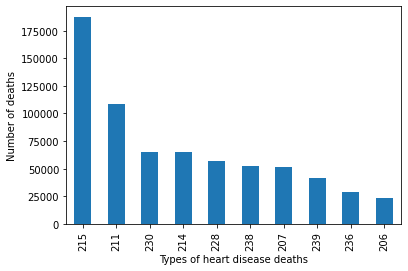

In [164]:
#Top 10 heart disease deaths

print(hd2018['cause_recode_358'].value_counts().head(10))
hd2018['cause_recode_358'].value_counts().head(10).plot(kind='bar', x='cause_recode_358')
plt.xlabel("Types of heart disease deaths")
plt.ylabel("Number of deaths")

#215 All other forms of chronic ischemic heart disease (I20,I25.1-I25.9) 
#211 Acute myocardial infarction (I21-I22) 
#230 Congestive heart failure (I50.0) 
#214 Atherosclerotic cardiovascular disease, so described (I25.0) 
#228 Conduction disorders and cardiac dysrhythmias (I44-I49) 
#238 Stroke, not specified as hemorrhage or infarction (I64) 
#207 Hypertensive heart disease (I11) 
#239 Other cerebrovascular diseases and their sequelae (I67,I69) 
#236 3 Intracerebral and other intracranial hemorrhage (I61-I62) 
#206 Essential (primary) hypertension (I10) 

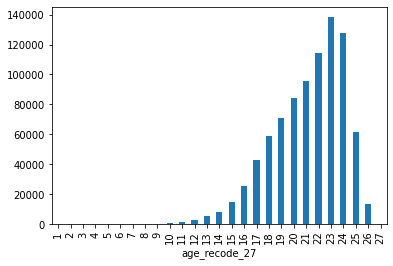

In [197]:
hd2018.groupby("age_recode_27").size().plot(kind="bar")

#higher risk of dying from a heart disease the older you get

#top: 23 -> 85 - 89 years 
#24 -> 90 - 94 years 
#22 -> 80 - 84 years 
#21 -> 75 - 79 years 



In [187]:
hd2018.groupby(["sex"])["cause_recode_358"].size().sort_values()


sex
F    420164
M    448498
Name: cause_recode_358, dtype: int64

Text(0, 0.5, 'Number of Deaths')

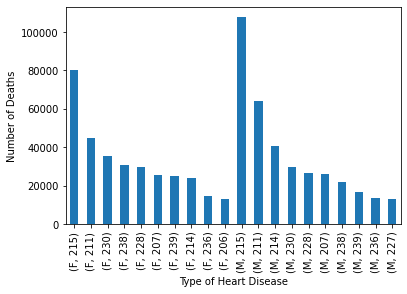

In [186]:
#type of disease compared to Female and Male

def top_val_count(x, n=10):
    return x.value_counts().head(n)

plot_hd=hd2018.groupby(["sex"]).cause_recode_358
plot_hd.apply(top_val_count).plot(kind="bar", x='cause_recode_358')
plt.xlabel("Type of Heart Disease")
plt.ylabel("Number of Deaths")

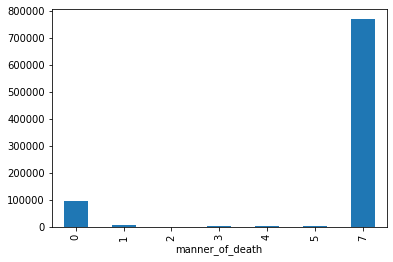

In [190]:
hd2018.groupby("manner_of_death").size().plot(kind="bar")

#7 natural 
#0 Not specified 

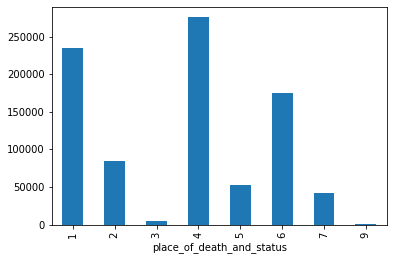

In [191]:
hd2018.groupby("place_of_death_and_status").size().plot(kind="bar")

#top: 4 -> Decedent’s home
#1 -> Hospital, clinic or Medical Center - Inpatient
#6 -> Nursing home/long term care
#3 -> Hospital, Clinic or Medical Center - Dead on Arrival

In [234]:
hd2018.groupby("bridged_race_1").size()

#hd2018.groupby("bridged_race_1").size().plot(kind="bar")


bridged_race_1
1     7.26969
2     1.12268
3     0.04943
4     0.05110
5     0.02790
6     0.00277
7     0.04619
18    0.03256
28    0.01729
38    0.00281
48    0.02027
58    0.00124
68    0.03190
78    0.01079
dtype: float64

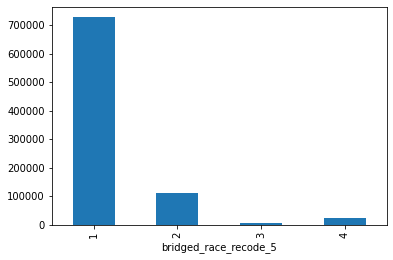

In [211]:
hd2018.groupby("bridged_race_recode_5").size().plot(kind="bar")


In [215]:
hd2018.groupby("bridged_race_recode_5")["place_of_death_and_status"].value_counts()#.plot(kind="bar")

#place of death
#top: 4 -> Decedent’s home
# 1 -> Hospital, clinic or Medical Center- Inpatient
# 2 -> Hospital, Clinic or Medical Center- Outpatient or admitted to Emergency Room
# 3 -> Hospital, Clinic or Medical Center- Dead on Arrival
# 4 -> Decedent’s home
# 5 -> Hospice facility
# 6 -> Nursing home/long term care
# 7 -> Other
# 9 -> Place of death unknown

#race
#Race Recode 5
# 0 -> Other (Puerto Rico only)
# 1 -> White
# 2 -> Black
# 3 -> American Indian
# 4 -> Asian or Pacific Islander


bridged_race_recode_5  place_of_death_and_status
1                      4                            231726
                       1                            188461
                       6                            155397
                       2                             65259
                       5                             45936
                       7                             36812
                       3                              3249
                       9                               129
2                      1                             35415
                       4                             34911
                       2                             16068
                       6                             15512
                       5                              5422
                       7                              4190
                       3                               730
                       9                                20
3      

In [223]:
pd.set_option('display.max_rows', None)

hd2018.groupby("bridged_race_1")["place_of_death_and_status"].value_counts()#.plot(kind="bar")


# 01 -> White
# 02 -> Black
# 03 -> American Indian (includes Aleuts and Eskimos)
# 04 -> Chinese
# 05 -> Japanese
# 06 -> Hawaiian (includes Part-Hawaiian)
# 07 -> Filipino
# 18 -> Asian Indian
# 28 -> Korean
# 38 -> Samoan
# 48 -> Vietnamese
# 58 -> Guamanian
# 68 -> Other Asian or Pacific Islander in areas reporting codes 18-58
# 78 -> Combined other Asian or Pacific Islander, includ

bridged_race_1  place_of_death_and_status
1               4                            231726
                1                            188461
                6                            155397
                2                             65259
                5                             45936
                7                             36812
                3                              3249
                9                               129
2               1                             35415
                4                             34911
                2                             16068
                6                             15512
                5                              5422
                7                              4190
                3                               730
                9                                20
3               4                              1677
                1                              1594
                2     

In [225]:
hd2018.groupby("hispanicorigin")["place_of_death_and_status"].value_counts()#.plot(kind="bar")


hispanicorigin  place_of_death_and_status
100             4                            256517
                1                            214678
                6                            167384
                2                             77868
                5                             49371
                7                             39426
                3                              3940
                9                               143
200             4                                72
                1                                55
                6                                22
                2                                17
                5                                15
                7                                15
                3                                 1
201             1                                 1
203             1                                 1
                4                                 1
204             4     

In [226]:
hd2018.groupby("hispanicorigin_bridgeracerecode")["place_of_death_and_status"].value_counts()#.plot(kind="bar")


hispanicorigin_bridgeracerecode  place_of_death_and_status
1                                1                              9925
                                 4                              9550
                                 2                              3548
                                 6                              3179
                                 7                              1404
                                 5                              1007
                                 3                                64
2                                1                              2476
                                 4                              2065
                                 6                              1280
                                 2                               891
                                 5                               539
                                 7                               245
                                 3          

### Heart Disease among people less than 65 years old 
##### Rates per 100,000 population

01 ... Under 1 month (includes not stated weeks, days, hours, and minutes)\
02 ... 1 month - 11 months (includes not stated months)\
03 ... 1 year\
04 ... 2 years\
05 ... 3 years\
06 ... 4 years\
07 ... 5 - 9 years\
08 ... 10 - 14 years\
09 ... 15 - 19 years\
10 ... 20 - 24 years\
11 ... 25 - 29 years\
12 ... 30 - 34 years\
13 ... 35 - 39 years\
14 ... 40 - 44 years\
15 ... 45 - 49 years\
16 ... 50 - 54 years\
17 ... 55 - 59 years\
18 ... 60 - 64 years 

In [23]:
hd_age=hd2018.copy()
hd_age.age_recode_27=hd_age.age_recode_27.astype(np.int64)
hd_age=hd_age[hd_age.age_recode_27<=18]

In [22]:
hd_age

,person_id,year_id,resident_status,edu_2003_rev,edu_2003_Desc,month_of_death,sex,age_recode_27,place_of_death_and_status,marital_status,...,recAx_condition_11th,recAx_condition_12th,recAx_condition_13th,recAx_condition_14th,recAx_condition_15th,recAx_condition_16th,recAx_condition_17th,recAx_condition_18th,recAx_condition_19th,recAx_condition_20th
13,14,8,1,3,HsGedCom,1,F,13,1,S,...,,,,,,,,,,
39,40,8,2,6,BA BS,1,M,18,1,D,...,,,,,,,,,,
79,80,8,1,1,1-8 Grd,1,M,16,4,U,...,,,,,,,,,,
86,87,8,3,6,BA BS,1,M,17,7,D,...,,,,,,,,,,
100,101,8,3,1,1-8 Grd,1,F,4,7,S,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839162,2839163,8,1,9,Unknwn,10,M,18,4,S,...,,,,,,,,,,
2839168,2839169,8,1,1,1-8 Grd,12,M,16,1,M,...,,,,,,,,,,
2839188,2839189,8,1,1,1-8 Grd,12,M,18,2,D,...,,,,,,,,,,
2839194,2839195,8,1,9,Unknwn,10,F,17,6,U,...,,,,,,,,,,


In [232]:
bridged_race_1_rate=hd_age.bridged_race_1.value_counts()/100000
#bridged_race_1_rate

#check rate for recode cause 211 -> 26365

#disease count/bridged_race_1_rate
#26365/1.18363 = 22274.697329401926...white race
#26365/0.37889 = 69584.83...black race

#(infection rate / population ) *100000
#(26365/118363)*100000 = 22274.697329401923


#hd_age['cause_recode_358'].value_counts().astype(np.int64)

#hd_age[hd_age.bridged_race_1==1].groupby(["cause_recode_358","bridged_race_1"]).agg({"bridged_race_1":"count"})
#tot=hd_age[hd_age.bridged_race_1==1].groupby(["bridged_race_1"]).size()/100000

test_code=pd.DataFrame(hd_age.groupby(["cause_recode_358"]).size()).rename(columns={0:"count"}).sort_values(by="count", ascending = False).astype(np.int64)
#test_code

white_race = test_code.apply(lambda t: t/1.18363).rename(columns={"count":"white_race"})
black_race = test_code.apply(lambda t: t/0.37889).rename(columns={"count":"black_race"})


1     1.18363
2     0.37889
3     0.01690
68    0.01033
7     0.00861
18    0.00664
4     0.00586
48    0.00442
78    0.00348
28    0.00255
5     0.00211
38    0.00144
6     0.00074
58    0.00052
Name: bridged_race_1, dtype: float64

In [230]:
#join both race

white_race.join(black_race).head(10)

,white_race,black_race
cause_recode_358,,
211,22274.697329,69584.839927
215,21040.358896,65728.839505
214,18093.492054,56523.001399
207,12690.621225,39644.751775
228,8182.455666,25561.508617
227,5913.165432,18472.379846
236,5600.567745,17495.843121
238,4583.357975,14318.139830
230,4344.262988,13571.221199


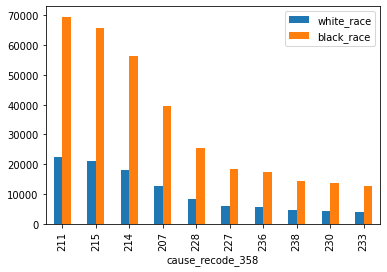

In [231]:
white_race.join(black_race).head(10).plot(kind="bar")

In [124]:
hd_age['cause_recode_358'].value_counts()

211    26365
215    24904
214    21416
207    15021
228     9685
227     6999
236     6629
238     5425
230     5142
233     4798
206     4432
218     3355
239     3029
237     2884
235     2598
242     2564
231     2012
219     1875
208     1845
243     1784
245     1703
209     1184
212     1161
226     1119
225     1100
221      846
241      457
246      430
222      400
224      375
201      370
232      359
204      214
203      118
199        9
202        5
Name: cause_recode_358, dtype: int64

211    26365
215    24904
214    21416
207    15021
228     9685
227     6999
236     6629
238     5425
230     5142
233     4798
Name: cause_recode_358, dtype: int64


Text(0, 0.5, 'Number of deaths')

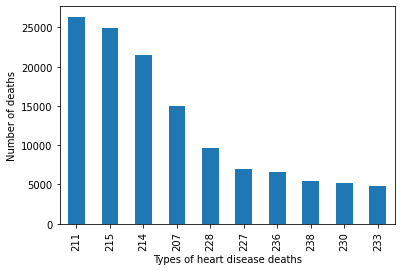

In [24]:
#Top 10 heart disease deaths

print(hd_age['cause_recode_358'].value_counts().head(10))
hd_age['cause_recode_358'].value_counts().head(10).plot(kind='bar', x='cause_recode_358')
plt.xlabel("Types of heart disease deaths")
plt.ylabel("Number of deaths")

#215 All other forms of chronic ischemic heart disease (I20,I25.1-I25.9) 
#211 Acute myocardial infarction (I21-I22) 
#230 Congestive heart failure (I50.0) 
#214 Atherosclerotic cardiovascular disease, so described (I25.0) 
#228 Conduction disorders and cardiac dysrhythmias (I44-I49) 
#238 Stroke, not specified as hemorrhage or infarction (I64) 
#207 Hypertensive heart disease (I11) 
#239 Other cerebrovascular diseases and their sequelae (I67,I69) 
#236 3 Intracerebral and other intracranial hemorrhage (I61-I62) 
#206 Essential (primary) hypertension (I10) 

In [28]:
hd_age.groupby("bridged_race_1").size()

bridged_race_1
1     118363
2      37889
3       1690
4        586
5        211
6         74
7        861
18       664
28       255
38       144
48       442
58        52
68      1033
78       348
dtype: int64